# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)
Image shape: (32, 32, 3)
Number of classes: 100


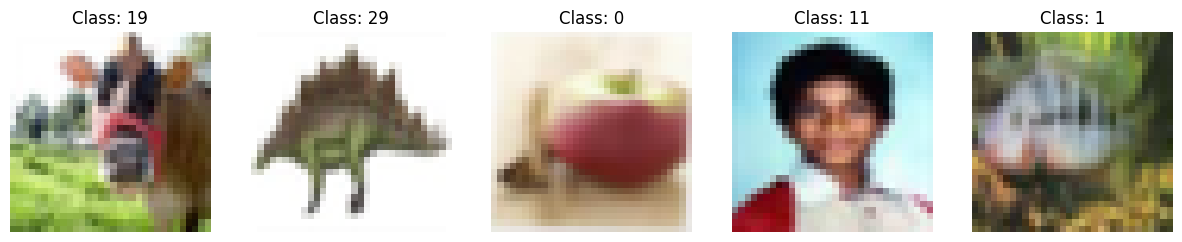

In [3]:
# Your code here

import matplotlib.pyplot as plt
# Exploring the dataset
train_shape = x_train.shape
test_shape = x_test.shape
image_shape = x_train[0].shape
num_classes = len(set(y_train.flatten()))

print(f"Training set shape: {train_shape}")
print(f"Test set shape: {test_shape}")
print(f"Image shape: {image_shape}")
print(f"Number of classes: {num_classes}")

# Display a few examples from the training set
examples = x_train[:5]
labels = y_train[:5]

# Plot examples
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i, (image, label) in enumerate(zip(examples, labels)):
    axs[i].imshow(image)
    axs[i].set_title(f"Class: {label[0]}")
    axs[i].axis('off')
plt.show()

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [4]:
# Your code here

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

# Normalize the images to have pixel values in the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train_onehot = to_categorical(y_train, num_classes=100)
y_test_onehot = to_categorical(y_test, num_classes=100)

# Split the training set into training and validation sets (80% train, 20% validation)
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(
    x_train, y_train_onehot, test_size=0.2, random_state=42
)

# Print shapes of the resulting datasets
print(f"Training set shape: {x_train_split.shape}")
print(f"Validation set shape: {x_val_split.shape}")
print(f"Test set shape: {x_test.shape}")

Training set shape: (40000, 32, 32, 3)
Validation set shape: (10000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Your code here

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(100, activation='softmax')
])

# Print the model summary
model.summary()

c:\Users\skiev\AppData\Local\Continuum\envs\scale2prod\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        51,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,193,636 (4.55 MB)

 Trainable params: 1,193,636 (4.55 MB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> Categorical Crossentropy: This is a common loss function for multi-class classification problems, where each sample belongs to one of the classes. It measures the difference between the predicted probability distribution and the true distribution (one-hot encoded labels). It encourages the model to output probabilities that are close to 1 for the correct class and 0 for all other classes.
- <b>Optimizer:</b> Adam: The Adam optimizer is popular for training deep neural networks. It combines the advantages of two other optimizers: AdaGrad and RMSProp. Adam adapts the learning rate for each parameter, which helps in converging quickly and efficiently. It also works well with sparse gradients and noisy data.

In [7]:
from keras import optimizers

# Your code here
# Here's the code to compile the model:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [8]:
# Your code here

# Train the model
history = model.fit(
    x_train_split, y_train_split,
    epochs=20,
    batch_size=32,
    validation_data=(x_val_split, y_val_split)
)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 58s 44ms/step - accuracy: 0.0751 - loss: 4.0903 - val_accuracy: 0.2424 - val_loss: 3.0977
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.2791 - loss: 2.8925 - val_accuracy: 0.3242 - val_loss: 2.7006
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 56s 45ms/step - accuracy: 0.3904 - loss: 2.3474 - val_accuracy: 0.3653 - val_loss: 2.5014
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 56s 45ms/step - accuracy: 0.4838 - loss: 1.9434 - val_accuracy: 0.3927 - val_loss: 2.4415
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 57s 45ms/step - accuracy: 0.5587 - loss: 1.6212 - val_accuracy: 0.3996 - val_loss: 2.4712
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 60s 48ms/step - accuracy: 0.6436 - loss: 1.2614 - val_accuracy: 0.4001 - val_loss: 2.6142
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 60s 48ms/step - accuracy: 0.7247 - loss: 0.9672 - val_accuracy: 0.3942 - val_loss: 2.8950
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 60s 48ms/step - accuracy: 0.7912 -

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> Description: Measures the proportion of correctly classified samples among the total samples. It is calculated as the number of correct predictions divided by the total number of predictions.
Calculation: 
			Number of correct predictions
Accuracy= -----------------------------------
			 Total number of predictions
- <b>Other metric:</b> ______
- <b>Reason for selection:</b>  Top-5 accuracy is often used in multi-class classification problems with a large number of classes, like CIFAR-100. It measures the proportion of samples where the correct label is among the top five predicted labels. This metric is particularly useful when the model's task is difficult and a single class prediction might not capture the model's partial understanding. Calculation: For each sample, the model outputs probabilities for each class. If the correct label is within the top five predicted probabilities, the prediction is considered correct.
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> Accuracy: The value will indicate the overall correctness of the model's predictions. A higher accuracy means the model is more often correctly predicting the exact class. Top-5 Accuracy: This value represents the model's ability to include the correct class within its top five predictions. A high Top-5 accuracy can indicate that the model is often close to the correct answer even if it's not the top prediction.

In [10]:
# Your code here
from keras.metrics import top_k_categorical_accuracy
# Define a custom function for Top-5 accuracy
def top_5_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=5)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test_onehot)

# Calculate the Top-5 accuracy on the test set
y_pred = model.predict(x_test)
top_5_acc = top_5_accuracy(y_test_onehot, y_pred).numpy().mean()

# Report the metrics
print(f"Accuracy: {test_accuracy}")
print(f"Top-5 Accuracy: {top_5_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.3638 - loss: 6.6451
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
Accuracy: 0.35989999771118164
Top-5 Accuracy: 0.644599974155426


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

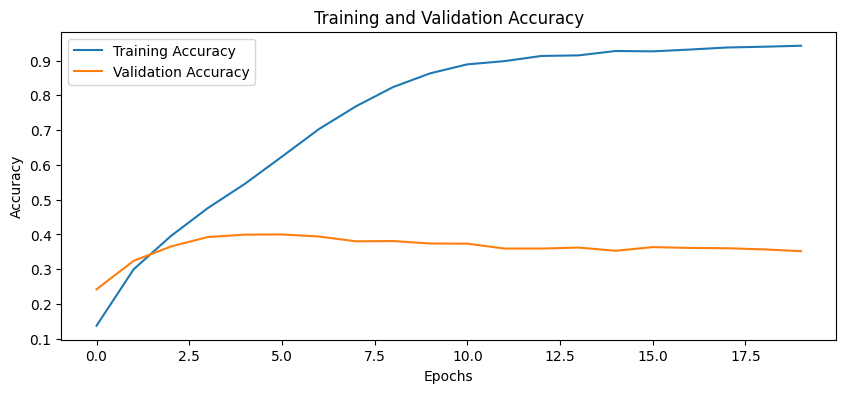

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


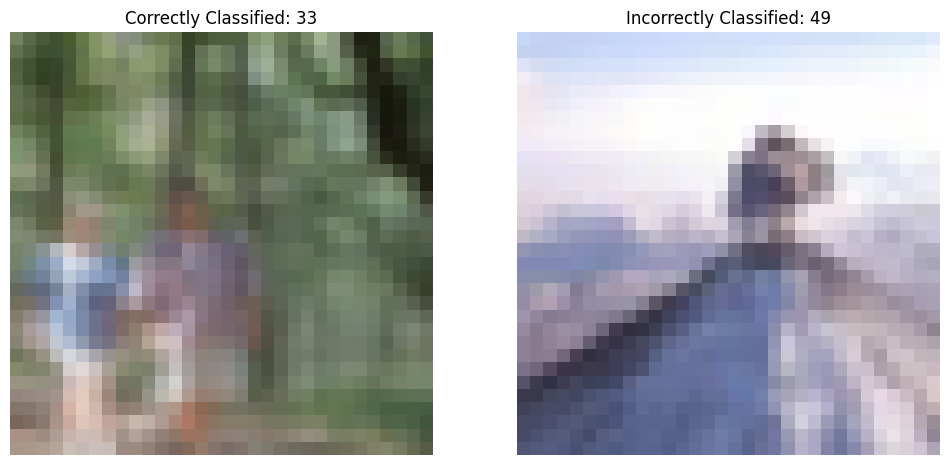

Correctly Classified Image - Probabilities: [2.26578211e-19 1.35200171e-10 4.87388819e-12 6.60751382e-08
 1.04677747e-06 1.36890426e-14 5.33412689e-11 7.37449855e-14
 5.64080384e-03 4.78022205e-11 1.08183136e-10 7.09086976e-08
 1.70438329e-03 5.14403797e-10 1.01522096e-10 7.89976582e-07
 2.25257972e-11 8.24158623e-12 5.80361270e-09 1.53177623e-10
 3.70459496e-18 5.67999586e-13 3.12789239e-11 7.81247015e-14
 1.84840428e-14 7.72100855e-11 9.33363543e-12 7.40497280e-03
 4.86349632e-12 3.88893895e-08 8.57587512e-09 1.18105736e-05
 3.02691241e-08 9.68990505e-01 7.11406983e-06 8.45721999e-08
 2.66997865e-11 5.33186106e-10 4.85038890e-06 3.04541281e-09
 8.96023639e-14 1.48798144e-11 2.95486068e-04 1.14611943e-07
 1.09818521e-09 1.20230020e-10 2.42470258e-12 5.51981768e-15
 5.37468112e-15 3.50813816e-17 2.20482936e-03 5.85884496e-09
 1.20885642e-13 1.08552822e-23 2.19783501e-12 1.06016408e-07
 3.66024463e-03 4.64481058e-12 1.86491604e-15 6.81691092e-11
 2.46602849e-10 2.07113307e-18 8.05825853

In [11]:
# Your code here

import matplotlib.pyplot as plt
import numpy as np

# Plot training and validation accuracy
plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Get predictions for the test set
y_pred = model.predict(x_test)

# Select a correctly classified image
correct_idx = np.argmax(y_pred, axis=1) == np.argmax(y_test_onehot, axis=1)
correct_image = x_test[correct_idx][0]
correct_label = np.argmax(y_test_onehot[correct_idx][0])
correct_prob = y_pred[correct_idx][0]

# Select an incorrectly classified image
incorrect_idx = np.argmax(y_pred, axis=1) != np.argmax(y_test_onehot, axis=1)
incorrect_image = x_test[incorrect_idx][0]
incorrect_label = np.argmax(y_test_onehot[incorrect_idx][0])
incorrect_prob = y_pred[incorrect_idx][0]

# Plot the correctly classified image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(correct_image)
plt.title(f"Correctly Classified: {correct_label}")
plt.axis('off')

# Plot the incorrectly classified image
plt.subplot(1, 2, 2)
plt.imshow(incorrect_image)
plt.title(f"Incorrectly Classified: {incorrect_label}")
plt.axis('off')

plt.show()

# Report classification probabilities
print(f"Correctly Classified Image - Probabilities: {correct_prob}")
print(f"Incorrectly Classified Image - Probabilities: {incorrect_prob}")

Discussion of the Results

1. Training and Validation Accuracy Plot:

	- The plot shows how the training and validation accuracy change over the epochs. Ideally, both should improve over time, with the training accuracy typically being higher.

2. Classification Probabilities:

	- For the correctly classified image, the highest probability should correspond to the true class label, indicating that the model is confident in its prediction.
    - For the incorrectly classified image, the true class label will not have the highest probability, showing where the model made an error. 
    
3. Interpretation:

	- If the model's training and validation accuracy both increase and stabilize at high values, it indicates good learning and generalization.

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [13]:
# Your code here
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),  # Dropout added
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),  # Dropout added
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout added
    Dense(100, activation='softmax')
])

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,              # Set input mean to 0 over the dataset
    samplewise_center=False,               # Set each sample mean to 0
    featurewise_std_normalization=False,   # Divide inputs by std of the dataset
    samplewise_std_normalization=False,    # Divide each input by its std
    zca_whitening=False,                   # Apply ZCA whitening
    rotation_range=15,                     # Randomly rotate images by 15 degrees
    width_shift_range=0.1,                 # Randomly shift images horizontally by 10%
    height_shift_range=0.1,                # Randomly shift images vertically by 10%
    horizontal_flip=True,                  # Randomly flip images horizontally
    vertical_flip=False                    # Do not flip images vertically
)

# Fit the model with data augmentation
history = model.fit(
    datagen.flow(x_train_split, y_train_split, batch_size=32),
    epochs=30,  # Increase epochs to allow the model to train on more augmented data
    validation_data=(x_val_split, y_val_split)
)

Epoch 1/30


c:\Users\skiev\AppData\Local\Continuum\envs\scale2prod\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 63ms/step - accuracy: 0.0349 - loss: 4.3642 - val_accuracy: 0.1263 - val_loss: 3.7624
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 77s 61ms/step - accuracy: 0.1323 - loss: 3.6957 - val_accuracy: 0.2015 - val_loss: 3.3327
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 77s 61ms/step - accuracy: 0.1758 - loss: 3.4040 - val_accuracy: 0.2559 - val_loss: 3.0407
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 60ms/step - accuracy: 0.2112 - loss: 3.2414 - val_accuracy: 0.2802 - val_loss: 2.9178
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 66ms/step - accuracy: 0.2324 - loss: 3.1252 - val_accuracy: 0.3070 - val_loss: 2.8113
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 67ms/step - accuracy: 0.2460 - loss: 3.0389 - val_accuracy: 0.3053 - val_loss: 2.7874
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 66ms/step - accuracy: 0.2572 - loss: 2.9797 - val_accuracy: 0.2958 - val_loss: 2.8261
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 64ms/step - accuracy: 0.2761 - loss: 2.89

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [14]:
# Your code here
# Re-train the model with data augmentation and dropout
history = model.fit(
    datagen.flow(x_train_split, y_train_split, batch_size=32),
    epochs=30,  # Same number of epochs as the baseline model
    validation_data=(x_val_split, y_val_split)
)

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 65ms/step - accuracy: 0.3589 - loss: 2.4754 - val_accuracy: 0.3906 - val_loss: 2.3849
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 78s 62ms/step - accuracy: 0.3546 - loss: 2.4824 - val_accuracy: 0.3914 - val_loss: 2.3952
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 79s 63ms/step - accuracy: 0.3565 - loss: 2.4889 - val_accuracy: 0.3969 - val_loss: 2.3413
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 64ms/step - accuracy: 0.3682 - loss: 2.4380 - val_accuracy: 0.3987 - val_loss: 2.3428
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 64ms/step - accuracy: 0.3608 - loss: 2.4419 - val_accuracy: 0.3983 - val_loss: 2.3479
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 65ms/step - accuracy: 0.3623 - loss: 2.4511 - val_accuracy: 0.3872 - val_loss: 2.4425
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 64ms/step - accuracy: 0.3666 - loss: 2.4529 - val_accuracy: 0.3994 - val_loss: 2.3502
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 65ms/step - accuracy: 0.3687 -

In [15]:
# Evaluate the enhanced model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test_onehot)

# Calculate the Top-5 accuracy on the test set
y_pred = model.predict(x_test)
top_5_acc = top_5_accuracy(y_test_onehot, y_pred).numpy().mean()

# Print the metrics
print(f"Enhanced Model - Test Accuracy: {test_accuracy}")
print(f"Enhanced Model - Top-5 Accuracy: {top_5_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.4249 - loss: 2.3017
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
Enhanced Model - Test Accuracy: 0.4244000017642975
Enhanced Model - Top-5 Accuracy: 0.7164999842643738


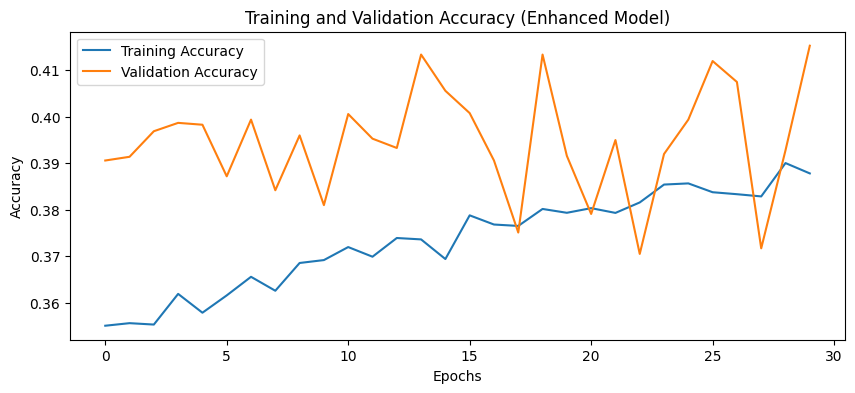

In [16]:
# Plot training and validation accuracy for the enhanced model
plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (Enhanced Model)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

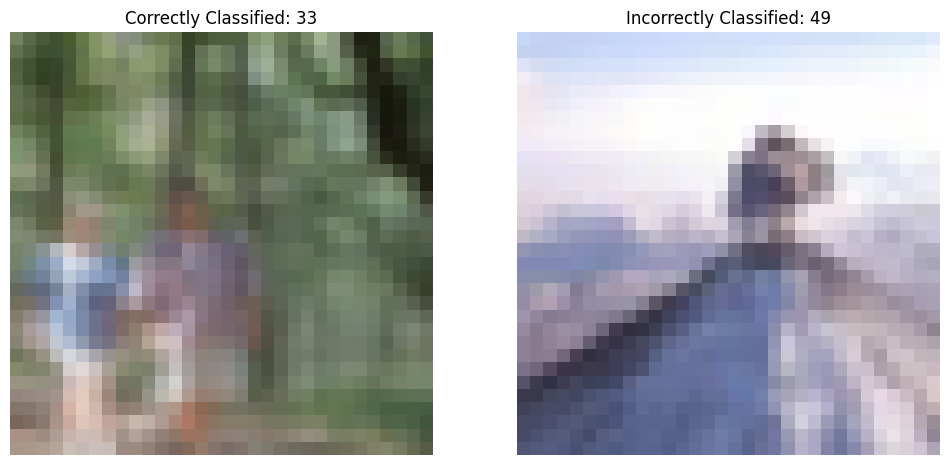

Enhanced Model - Correctly Classified Image Probabilities: [3.45373086e-09 1.65786132e-05 5.54841745e-06 7.34437432e-04
 3.11756413e-03 1.24923945e-05 6.18289869e-06 4.32940542e-05
 3.60447285e-03 8.69607844e-04 5.05445496e-06 6.42243140e-06
 2.35136528e-03 1.34548529e-07 3.66185086e-05 2.09890713e-04
 2.25744716e-05 1.42907302e-05 3.90264252e-03 1.66664351e-04
 7.99223976e-09 5.49946963e-05 1.65411529e-05 3.28116002e-04
 4.83609199e-07 4.69325023e-04 6.36583427e-05 6.33467920e-03
 3.15265133e-05 6.16353238e-04 7.55886276e-06 9.28436220e-03
 2.15750793e-03 3.71994287e-01 3.42451152e-04 1.11236259e-05
 9.00786472e-05 7.51747168e-04 1.24681229e-02 2.31395056e-03
 1.77469030e-06 4.29638385e-06 6.29102066e-02 3.26139037e-04
 5.25785552e-04 5.96148253e-04 1.29273531e-05 1.58694002e-03
 2.83115420e-09 9.03071850e-07 4.36442047e-02 1.00235117e-03
 2.51885445e-04 1.40937406e-14 4.10466100e-06 2.61821900e-03
 2.45491639e-02 2.31922495e-05 2.59936628e-09 1.02170892e-01
 5.52232677e-07 1.86952286

In [17]:
# Select a correctly classified image from the enhanced model
correct_idx = np.argmax(y_pred, axis=1) == np.argmax(y_test_onehot, axis=1)
correct_image = x_test[correct_idx][0]
correct_label = np.argmax(y_test_onehot[correct_idx][0])
correct_prob = y_pred[correct_idx][0]

# Select an incorrectly classified image from the enhanced model
incorrect_idx = np.argmax(y_pred, axis=1) != np.argmax(y_test_onehot, axis=1)
incorrect_image = x_test[incorrect_idx][0]
incorrect_label = np.argmax(y_test_onehot[incorrect_idx][0])
incorrect_prob = y_pred[incorrect_idx][0]

# Plot the correctly classified image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(correct_image)
plt.title(f"Correctly Classified: {correct_label}")
plt.axis('off')

# Plot the incorrectly classified image
plt.subplot(1, 2, 2)
plt.imshow(incorrect_image)
plt.title(f"Incorrectly Classified: {incorrect_label}")
plt.axis('off')

plt.show()

# Report classification probabilities
print(f"Enhanced Model - Correctly Classified Image Probabilities: {correct_prob}")
print(f"Enhanced Model - Incorrectly Classified Image Probabilities: {incorrect_prob}")

### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here


Discussion of Results: 
    - The enhanced model showed modest improvement in validation accuracy, reaching 41.53%, and had a lower, more stable validation loss compared to the baseline model, indicating reduced overfitting.

Performance Improvement: 
    - Yes, the model's performance improved. The enhanced model's use of Dropout and Data Augmentation helped in preventing overfitting and improved generalization.

Reason for Improvement: 
    - The improvements can be attributed to Dropout, which prevented over-reliance on specific neurons, and Data Augmentation, which provided a more diverse training dataset, helping the model generalize better.

Room for Improvement: 
    - There is room for further improvement as the validation accuracy is relatively modest, and the model still shows some signs of overfitting. Advanced architectures, better regularization, and optimization strategies could further enhance performance.

Future Techniques: 
    - In the future, techniques like ResNet, Vision Transformers, CutMix, automated hyperparameter tuning, and transfer learning with fine-tuning pre-trained models could be explored to boost the model's accuracy and generalization.


## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.